In [1]:
import pandas as pd
from pandas import *
import numpy as np
import csv
import nltk

data = pd.read_excel('articles May 09-June 08.xlsx')
data.columns = ['article_name', 'article_publisher', 'article_date', 'article_content', 'article_link']
data.head(12)

,article_name,article_publisher,article_date,article_content,article_link
0,New York Times: Mueller adds obstruction charg...,Brian Bonner,2018-06-08,"WASHINGTON — The special counsel, Robert S. M...",https://www.kyivpost.com/ukraine-politics/new-...
1,Washington Post: Trump calls for Russia to be ...,Washington Post,2018-06-08,President Trump on June 8 said Russia should ...,https://www.kyivpost.com/world/washington-post...
2,Poroshenko will be invited to NATO Summit on J...,Iryna Somer,2018-06-08,BRUSSELS — Ukrainian President Petro Poroshen...,https://www.kyivpost.com/ukraine-politics/poro...
3,New York Times: Trump attends G-7 with defianc...,New York Times,2018-06-08,President Trump arrived in Canada on June 8 w...,https://www.kyivpost.com/world/new-york-times-...
4,Euronews: Russian-designed nuclear power plant...,Euronews,2018-06-08,Bulgaria is set to restart construction of a ...,https://www.kyivpost.com/russia/euronews-russi...
5,Hromadske International: Inside the Arctic Rus...,Hromadske International,2018-06-08,In March Hromadske and Oleg Sentsov’s cousin ...,https://www.kyivpost.com/ukraine-politics/hrom...
6,Ukrainian Weekly: Canadian Group for Democracy...,The Ukrainian Weekly,2018-06-08,Following is the text of the letter sent on M...,https://www.kyivpost.com/ukraine-politics/ukra...
7,Poroshenko: Prisoners’ release to be priority ...,Interfax-Ukraine,2018-06-08,Ukrainian President Petro Poroshenko has anno...,https://www.kyivpost.com/ukraine-politics/poro...
8,UNIAN: Ukraine suggests real reason behind Rus...,UNIAN,2018-06-08,"Meanwhile, Russian officials claim the ships ...",https://www.kyivpost.com/russia/unian-ukraine-...
9,112.ua: Poroshenko supports cancellation of co...,112.ua,2018-06-08,"Petro Poroshenko, the President of Ukraine, s...",https://www.kyivpost.com/ukraine-politics/112-...


In [2]:
articlesss_text = list(data.article_content)
articles_names = list(data.article_name)

In [3]:
#articlesss_text

In [4]:
#print(set(data.article_publisher))

In [5]:
STOP_WORDS_ARR = ['a','about','above','after','again','against','all','am','an','and','any',
'are',"aren't",'as','at','although','always','among','another','also',
'be','because','been','before','being','below','between','both','but','by',
"can't",'cannot','could',"couldn't",
'did',"didn't",'do','does',"doesn't",'doing',"don't",'down','during','due',
'each','either','enough','especially','etc','\xa0',
'few','for','from','further',
'had',"hadn't",'has',"hasn't",'have',"haven't",'having','he',"he'd",'however',"hasn",
"he'll","he's",'her','here',"here's",'hers','herself','him','himself','his','how',"how's",'however',
'i',"i'd","i'll","i'm","i've",
'if','in','into','is',"isn't",'it',"it's",'its','itself',
"let's",
'just','read','russian',
'km','kg',
'me','more','most',"mustn't",'my','myself','may','mostly','mainly','mm','ml',
'no','nor','not','nearly','neither',
'of','off','on','once','only','or','other','ought','our','ours','ourselves','out','over','own','one',
'same',"shan't",'she',"she'd","she'll","she's",'should',"shouldn't",'so','some','such','say','said','says',
'than','that',"that's","the",'their','theirs','them','themselves','then','there',"there's",
'these','they',"they'd","they'll","they're","they've",'this','those','through','to','too','t','two',
'under','until','up','used','using','upon','ukrainian','ukraine',
'very','various',
'without','within','was',"wasn't",'we',"we'd","we'll","we're","we've",'were','will',
"weren't",'what',"what's",'when',"when's",'where',"where's",'which','while','who',
"who's",'whom','why',"why's",'with',"won't",'would',"wouldn't",'will',
'you',"you'd","you'll","you're","you've",'your','yours','yourself','yourselves', 
'.','!',',','’','s','“','first','second','”','(',')','$']

In [6]:
#Токенізація - групування слів
#токенізатори бувають двох типів: токенізатор слів і токенізатор речень
from nltk.tokenize import word_tokenize

tokenized_array_1 = list(map(word_tokenize, articlesss_text))

#переводимо текст у нижній регістр
for i in range(len(tokenized_array_1)):
    tokenized_array_1[i] = list(map(lambda a: a.lower(),tokenized_array_1[i]))

#відкидаємо всі не-слова (коми, точки, числа тощо)
for i in range(len(tokenized_array_1)):
    tokenized_array_1[i] = list(filter(lambda a: a.isalpha(),tokenized_array_1[i]))

In [7]:
#видаляємо з текстів шумові слова
for word in STOP_WORDS_ARR:
    for i in range(len(tokenized_array_1)):
         tokenized_array_1[i] = list(filter(lambda a: a!=word, tokenized_array_1[i]))

In [8]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

for i in range(len(tokenized_array_1)):
    tokenized_array_1[i] = list(map(lambda a: stemmer.stem(a),tokenized_array_1[i]))

In [9]:
for sent in tokenized_array_1:
    for word in sent:
        if len(word)<=3:
            sent.remove(word)

In [10]:
print(tokenized_array_1[0])

['washington', 'special', 'counsel', 'robert', 'mueller', 'brought', 'obstruct', 'charg', 'friday', 'presid', 'trump', 'former', 'campaign', 'chairman', 'paul', 'manafort', 'alleg', 'close', 'associ', 'prosecutor', 'suspect', 'intellig', 'stori']


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

vectorizer = TfidfVectorizer(stop_words=STOP_WORDS_ARR,tokenizer=word_tokenize)
X = vectorizer.fit_transform(articlesss_text)

In [12]:
myarray = np.asarray(X)

In [26]:
K = 15
model = KMeans(n_clusters=K, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(K):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :1]:
        print(' %s' % terms[ind])

Cluster 0:
 iran
Cluster 1:
 service
Cluster 2:
 forces
Cluster 3:
 champions
Cluster 4:
 russia
Cluster 5:
 putin
Cluster 6:
 trump
Cluster 7:
 sentsov
Cluster 8:
 president
Cluster 9:
 court
Cluster 10:
 osce
Cluster 11:
 crimean
Cluster 12:
 nato
Cluster 13:
 babchenko
Cluster 14:
 sushchenko


In [27]:
# кол-во текстов в каждом кластере
prediction_list = []
for sent in articlesss_text:
    Y = vectorizer.transform([sent])
    prediction = model.predict(Y)
    prediction_list.append(prediction[0])
cluster_text_count = []
for k in range(K):
    cluster_text_count.append(prediction_list.count(k))
print (cluster_text_count)


[117, 340, 69, 68, 667, 48, 84, 74, 144, 86, 52, 70, 102, 74, 71]


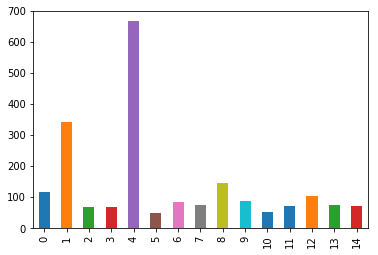

In [28]:
# diagram
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py

s = pd.Series(cluster_text_count, index=range(K))
s.plot(kind="bar")

In [29]:
cluster_texts = {}
for k in range(K):
    cluster_texts[k] = []
text_count = 0
for sent in articlesss_text:
    Y = vectorizer.transform([sent])
    prediction = model.predict(Y)
    cluster_texts[prediction[0]].append(articles_names[text_count])
    text_count+=1


In [31]:
cluster_texts[13]

['Dodgy lists',
 'For journalists in Ukraine, professional risks remain high',
 'Ukrainian police place seven persons from ‘list of 47’ under protection',
 'Anna Nemtsova: How that journalist’s faked murder exposed Russia’s gangsters and spies',
 'Ukraine authorities claim to have Russia’s hit list of 47 Ukrainian journalists, bloggers',
 'Guardian: Poroshenko backs faked murder of Russian journalist',
 'RFE/RL: In Ukraine, prominent journalists targeted by ‘Russian hit list’ question its …',
 'SBU: SBU didn’t give anyone list of 47 possible victims of Russian special services',
 'Hromadske International: Babchenko’s ‘murder,’ Kolchenko’s hunger strike, Estonian …',
 'Hanapolsky, Kiselev talk about security meeting for persons on Russia’s hitlist',
 'Censor.net: Klimkin says numerous casualties prevented due to SBU operation involving …',
 'Documentary investigation of journalist Sheremet murder receives award in Italy',
 'Polygraph: Does Putin have any ‘private foundations’?',
 'RFE/R

In [3]:
from collections import defaultdict

In [4]:
def count_words_in_texts(tokenized_array):
#
    d=defaultdict(int) #инициализируем 0
    for text in tokenized_array: 
        for word in text:
            d[word]+=1 #ключ - слово, а value = 
    return d

In [18]:
d=count_words_in_texts(tokenized_array_2)

In [19]:
def calc_freequencier_words(d, count=50):
    sorted_values = sorted(list(set(d.values())))[::-1] # 7-1 числа
    words_lists_dict = defaultdict(list) #list - 
    for word, value in d.items(): #ідемо по словам з частотами
        words_lists_dict[value].append(word) #result: массив частота - лист слов (например, {7} - {ukraininan})
    freequencier_words = list()
    for value in sorted_values:
        freequencier_words += words_lists_dict[value] #добавляем слова, которые имеют значение валью
    return freequencier_words[:count]

In [20]:
freequencier_words = calc_freequencier_words(d, count=50)
for word in freequencier_words:
    print("{}: {}".format(word, d[word]))

ukrain: 3172
kyiv: 1259
russian: 1241
russia: 1215
state: 824
year: 790
report: 786
presid: 722
servic: 655
accord: 624
court: 623
countri: 613
peopl: 562
nation: 552
minist: 538
compani: 538
intern: 520
new: 482
foreign: 482
time: 466
work: 440
secur: 428
forc: 423
use: 417
can: 416
june: 413
govern: 413
poroshenko: 409
world: 408
onli: 403
includ: 401
percent: 398
law: 394
region: 392
investig: 384
european: 381
part: 378
meet: 376
polit: 371
citi: 370
offic: 368
day: 366
dure: 363
journalist: 354
press: 354
ministri: 353
case: 350
develop: 347
support: 343
offici: 334


In [21]:
freequencier_words.sort(key = len,reverse = True)

In [22]:
lst1 = [i for i in freequencier_words if len(i)<5]
lst2 = [i for i in freequencier_words if len(i)>=5]

In [24]:
for word in lst2:
    print("{}: {}".format(word, d[word]))

poroshenko: 409
journalist: 354
investig: 384
european: 381
ministri: 353
russian: 1241
countri: 613
compani: 538
foreign: 482
percent: 398
develop: 347
support: 343
ukrain: 3172
russia: 1215
report: 786
presid: 722
servic: 655
accord: 624
nation: 552
minist: 538
intern: 520
govern: 413
includ: 401
region: 392
offici: 334
state: 824
court: 623
peopl: 562
secur: 428
world: 408
polit: 371
offic: 368
press: 354
